# Connectivity
*Written by Luke Chang*

So far, we have primarily been focusing on analyses related to task evoked brain activity. However, an entirely different way to study the brain is to characterize how it is intrinsically connected. There are many different ways to study functional connectivity. 

The primary division is studying how brain regions are *structurally* connected. In animal studies this might involve directly tracing bundles of neurons that are connected to other neurons. Diffusion imaging is a common way in which we can map how bundles of white matter are connected to each, based on the direction in which water diffuses along white matter tracks. There are many different techniques such as fractional ansiotropy and probablistic tractography. We will not be discussing structural connectivity in this course.

An alternative approach to studying connectivity is to examine how brain regions covary with each other in time. This is referred to as *functional connectivity*, but it is better to think about it has temporal covariation between regions as this does not necessarily imply that two regions are directly communication with each other.

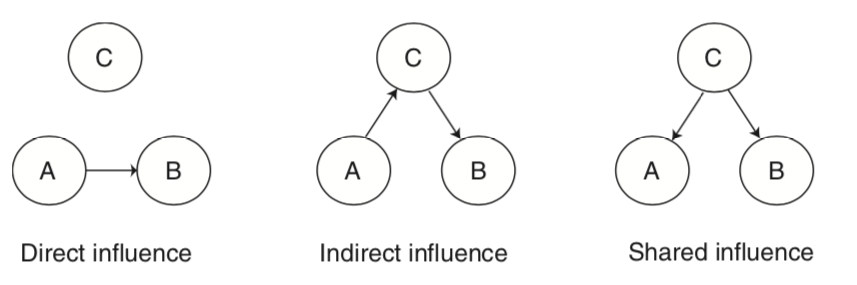

For example, regions can *directly* influence each other, or they can *indirectly* influence each other via a mediating region, or they can be affected similarly by a *shared influence*. These types of figures are often called *graphs*. These types of *graphical* models can be *directed* or *undirected*. Directed graphs imply a causal relationship, where one region A directly influence another region B. Directed graphs or *causal models* are typically described as *effective connectivity*, while undirected graphs in which the relationship is presumed to be bidirectional are what we typically describe as *functional connectivity*.

In [3]:
%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltools.data import Brain_Data
from scipy.stats import binom, ttest_1samp
from nltools.stats import fdr, one_sample_permutation
from copy import deepcopy

netid = 'f00275v'
output_dir = '/dartfs/rc/lab/P/Psych60/students_output/%s' % netid
data_dir = '/dartfs/rc/lab/P/Psych60/data/brainomics_data/'

output_dir = '/Volumes/Psych60/students_output/%s' % netid
data_dir = '/Volumes/Psych60/data/brainomics_data/'

## Functional Connectivity

### Seed Voxel Correlations

In [4]:
sub = 'S01'
file_name = os.path.join(data_dir, sub ,'preprocessed_fMRI_bold.nii.gz')
data = Brain_Data(file_name)

In [ ]:
tr = 2.4
fwhm = 6

def make_motion_covariates(mc):
    z_mc = zscore(mc)
    all_mc = pd.concat([z_mc, z_mc**2, z_mc.diff(), z_mc.diff()**2], axis=1)
    all_mc.fillna(value=0, inplace=True)
    return Design_Matrix(all_mc, sampling_freq=1/tr)


n_tr = len(data)
spikes = data.find_spikes(global_spike_cutoff=3, diff_spike_cutoff=3)
mc = pd.read_csv(os.path.join(data_dir, sub ,'realignment_parameters.txt'), sep='\s', header=None)
mc_cov = make_motion_covariates(mc)
dm_conv_filt = dm_conv.add_dct_basis(duration=128)
dm_conv_filt_poly = dm_conv_filt.add_poly(order=2, include_lower=True)
dm_conv_filt_poly_cov = dm_conv_filt_poly.append(mc_cov, axis=1).append(Design_Matrix(spikes.iloc[:,1:], sampling_freq=1/tr), axis=1)
data.X = dm_conv_filt_poly_cov

stats = data.regress()

smoothed = stats['beta'].smooth(fwhm=fwhm)

# smoothed.write(os.path.join(data_dir, sub, 'betas_denoised_smoothed_preprocessed_fMRI_bold.nii.gz'))

### Beta Series Correlations

### Psychophysiological Interactions

### Dynamic Connectivity

## Effective Connectivity
Effective connectivity refers to the degree that one brain region has a directed influence on another region. This approach requires making a number of assumptions about the data and requires testing how well a particular model describes the data. Typically, most researchers will create a model of a small number of nodes and compare different models to each other. This is because the overall model fit is typically in itself uninterpretable and because formulating large models can be quite difficult and computationally expensive.

$connections = \frac{n(n-1)}{2}$

### Structural Equation Modeling

### Granger Causality
Granger causality was originally developed in econometrics and is used to determine temporal causality. The idea is to quantify how past values of one brain region predict the current value of another brain region. This analysis can also be performed in the frequency domain using measures of coherence between two regions. In general, this technique is rarely used in fMRI data analysis as it requires making assumptions that all regions have the same hemodynamic response function (which does not seem to be true), and that the relationship is stationary, or not varying over time.

### Dynamic Causal Modeling

## Graph Theory

Similar to describing the structure of social networks, graph theory has also been used to characterize regions of the brain based on how they connected to other regions. Node in the network typically describe specific brain regions and edges represent the strength of the association between each edge. That is, the network can be represented as a graph of pairwise relationships between each region of the brain.

There are many different metrics of graphs that can be used to describe the overall efficiency of a network (e.g., small worldness), or how connected a region is to other regions (e.g., degree, centrality), or how long it would take to send information from one node to another node (e.g., path length, connectivity).

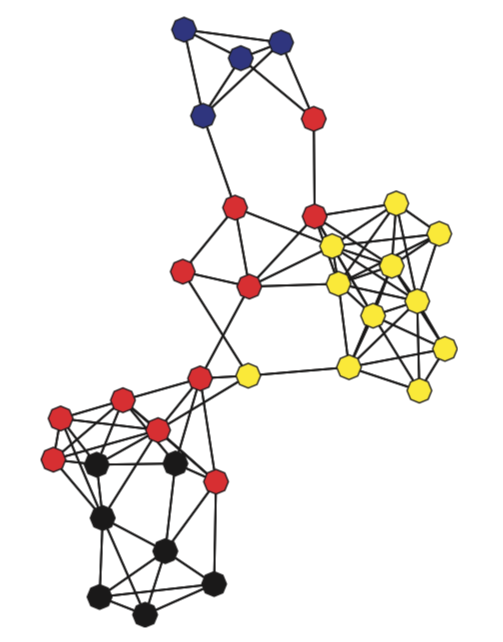

## Multivariate Decomposition

### Principal Components Analysis

### Independent Components Analysis

In [ ]:
sub_list = [os.path.basename(x) for x in glob(os.path.join(data_dir, 'S*'))]
sub_list = [x for x in sub_list if x != 'S30']
completed = [os.path.dirname(x).split('/')[-1] for x in glob(os.path.join(data_dir, '*', 'denoised_smoothed_preprocessed_fMRI_bold.nii.gz'))]
for sub in [x for x in sub_list if x not in completed]:
    print(sub)

    df = pd.read_csv(os.path.join(data_dir, 'Design_Matrix.csv'))
dm = Design_Matrix(df, sampling_freq=1/tr)
dm = dm.loc[:n_tr-1,:]
dm_conv = dm.convolve()
